# Assignment 5

In Phannachitta 2017, three sub-datasets of the Nasa93 datasets were 
subsetted with the Center variable and the result of kernel density plot 
showed that their distribution (of the productivity) are not the same

• Your task is to try to do the same with Desharnias dataset, by subsetting 
the Language variable and judging the calculated productivity

• Show box plots (1 pt), discuss the result (1 pt)

• Show the kernel density plot (1 pt), discuss the result (1 pt) 

• Discuss the different between box plot and kernel density plot (1pt)

• Please code. It is too difficult to calculate the kernel density manually

# So we code it

## Preparation

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('desharnais.csv')
data.drop('id',axis='columns',inplace=True)
data.drop('Project',axis='columns',inplace=True)
data.head(10)

,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,4,85,12,5152,253,52,305,34,302,1
1,0,0,86,4,5635,197,124,321,33,315,1
2,4,4,85,1,805,40,60,100,18,83,1
3,0,0,86,5,3829,200,119,319,30,303,1
4,0,0,86,4,2149,140,94,234,24,208,1
5,0,0,86,4,2821,97,89,186,38,192,1
6,2,1,85,9,2569,119,42,161,25,145,2
7,1,2,83,13,3913,186,52,238,25,214,1
8,3,1,85,12,7854,172,88,260,30,247,1
9,3,4,83,4,2422,78,38,116,24,103,1


## To calculate the productivity

to calculate the productivity value we can use 2 value which is `Effort` and `Points Ajust`

the reason to use those value came from the COCOMO principle

COCOMO formula is

`effort = size * Adjustment Factor (in this case is points ajust)`

COCOMO principle

```
COCOMO predicts the effort and/or schedule
for a software product based on inputs relating 
to the size of the software and a number of 
cost drivers that affects productivity
```


so we can simply say that 

### productivity = effort / size

or

### Productivity = effort / adjustment factor

but this dataset didn't have a `size` so we can calculate the productivity by the `Productivity = effort / adjustment factor`



In [3]:
data['Productivity'] = data.apply(lambda row: row.Effort / row.PointsAjust, axis=1)
data.head(10)

,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language,Productivity
0,1,4,85,12,5152,253,52,305,34,302,1,17.059603
1,0,0,86,4,5635,197,124,321,33,315,1,17.888889
2,4,4,85,1,805,40,60,100,18,83,1,9.698795
3,0,0,86,5,3829,200,119,319,30,303,1,12.636964
4,0,0,86,4,2149,140,94,234,24,208,1,10.331731
5,0,0,86,4,2821,97,89,186,38,192,1,14.692708
6,2,1,85,9,2569,119,42,161,25,145,2,17.717241
7,1,2,83,13,3913,186,52,238,25,214,1,18.285047
8,3,1,85,12,7854,172,88,260,30,247,1,31.797571
9,3,4,83,4,2422,78,38,116,24,103,1,23.514563


## Now Plot the box plot

In [ ]:
fig = px.box(data, y="Productivity", facet_col="Language", color="Language",
             boxmode="overlay", points='all')
fig.show()

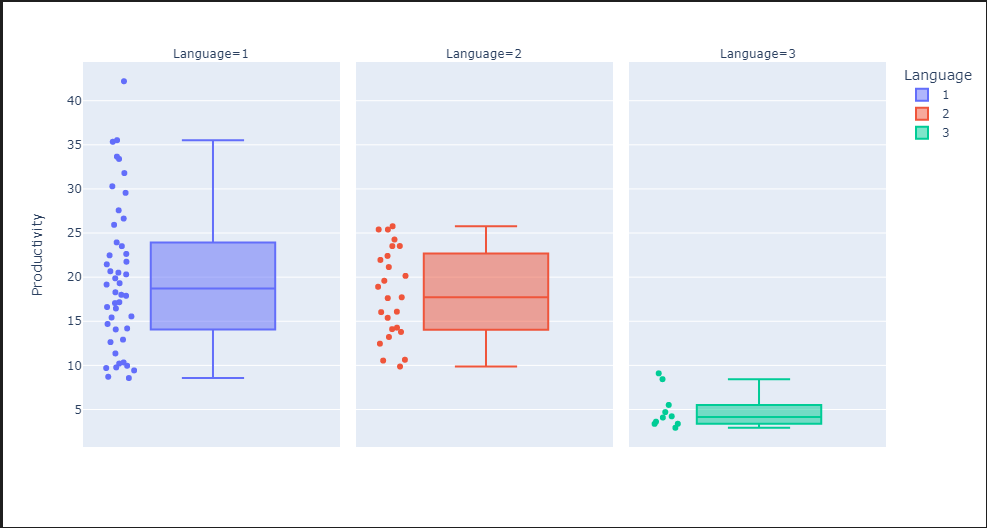

## Discussion

### Language 1

Language 1 is on the positive skew and has the highest productivity, and most of the project is above the average, so we can say that language 1 is a great language to use in the next project

### Language 2

Language 2 is on the normal distribution. Most project that uses language 2 is a very average project, which means they might come to the next choice. If the next project, we cannot find any team who uses language 1.

### Language 3

Language 3 is on the negative skew; most projects are below the average, with the lowest productivity. We can say that if the next project has language 3 as a choice, we can deny or cancel the project

## Kernel density plot

In [4]:
lang1 = data.loc[data['Language'] == 1]

lang2 = data.loc[data['Language'] == 2]

lang3 = data.loc[data['Language'] == 3]

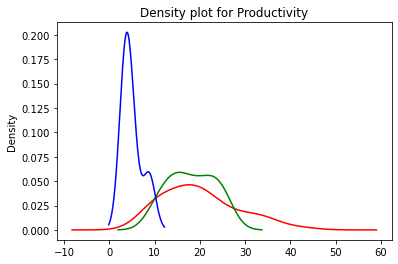

In [5]:
lang1.Productivity.plot.density(color='red')
lang2.Productivity.plot.density(color='green')
lang3.Productivity.plot.density(color='blue')


plt.title('Density plot for Productivity')
plt.show()

## Discussion

### Language 1 (Red line)

Language 1 is on the simple defect prediction model which mean if we use the language 1 it might made the project easier to maintain, easier to test, and easier to do a QA, QC, If the project using the language 1 when the change happend it will cause less problem

### Language 2 (Green line)

Language 2 is on the advance defect prediction model, which mean if we use the language 2 we need to spend more effort to maintain, writing test, and spend more time to do QA and QC, If the project using the language 2 when the change happend it cause some problem, but still a way to solve the problem.

### Language 3 (Blue line)

Language 3 is on the difference model, which mean. it might impossible to do any maintaining, testing and QA event adding a feature it will spend more time more than language 1 and 2, If the project using the language 3 when the change happend it likely will be impossible to change





# Discuss the different between box plot and kernel density plot

## box plot

- the box plot can see the language the produce the most productivity and can use the data as reference to next project

- in short box plot show me to decide the language to use in next project

## kernel density plot

- the kernel density plot show me how the project can be maintainable, testable, or ability to changeing
- in short kernel density plot show me how hard of the project as maintainer or tester